In [1]:
import pandas
import matplotlib.pyplot as plt

In [2]:
dir_name = "../logfiles_consul_1st/csv/"
file_write_list = dir_name+"write-list-%s.csv"
file_list_secrets = dir_name+"list-secrets-%s.csv"
file_write_random_secrets = dir_name+"write-random-secrets-%s.csv"
file_write_secrets = dir_name+"write-secrets-%s.csv"
file_read_secrets = dir_name+"read-secrets-%s.csv"

In [3]:
df_list_columns = pandas.read_csv(file_write_list % "scone").astype(dtype=float)
print(df_list_columns.columns)

Index(['run_time', 'lat_avg', 'lat_stdev', 'lat_max', 'lat_stdevpm', 'req_avg',
       'req_stdev', 'req_max', 'req_stdevpm', 'read', 'err_connect',
       'err_read', 'err_write', 'err_timeout', 'req_sec_tot', 'read_tot',
       'threads', 'connections', 'total_requests', 'total_responses',
       'min_lat', '50per', '90per', '99per', '9999per', 'throughput'],
      dtype='object')


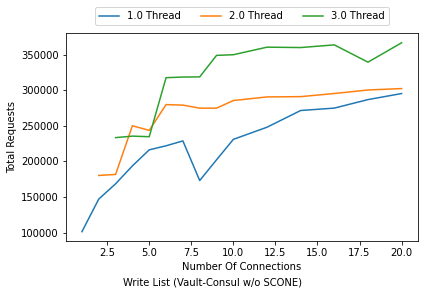

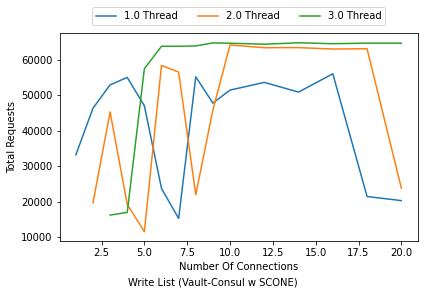

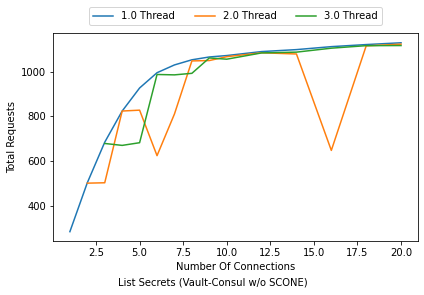

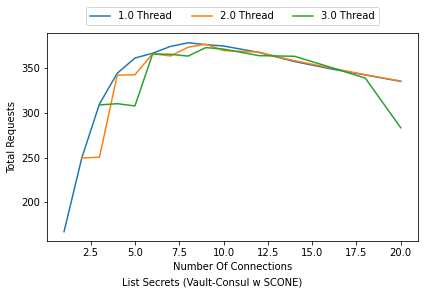

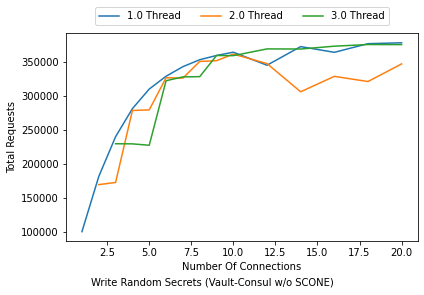

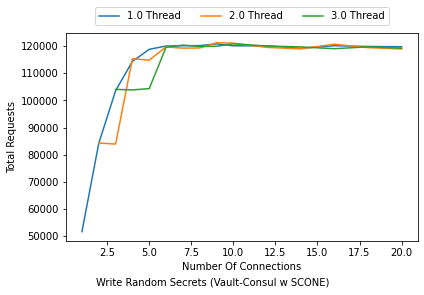

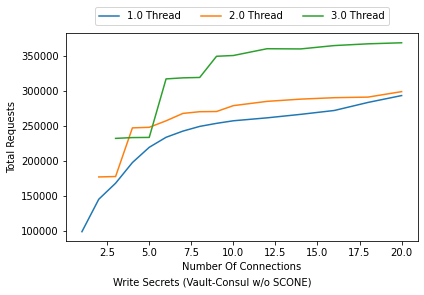

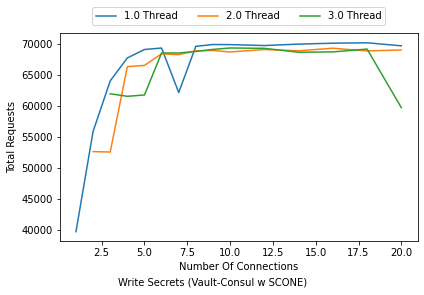

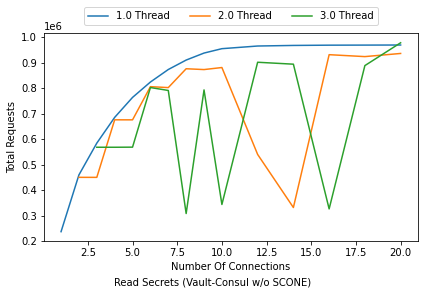

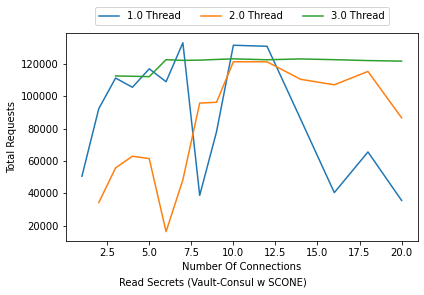

In [10]:
# run_times = [20,30,40,50]
run_type = [file_write_list,file_list_secrets,file_write_random_secrets,file_write_secrets,file_read_secrets]
graph_labels = ["Write List ","List Secrets ", "Write Random Secrets ", "Write Secrets ", "Read Secrets "]
run_times = [50]
for i in range(len(run_type)): 
    for run_time in run_times:
        df_list = pandas.read_csv(run_type[i] % "basic").astype(dtype=float)
        df_list = df_list[(df_list['run_time'] == run_time)]
        df_list_tc_request = df_list.groupby(['threads', 'connections'],as_index=False).mean()
        # print(df_list_tc_request)
        fig, ax = plt.subplots()
        for key, grp in df_list_tc_request.groupby(['threads']):
            ax = grp.plot(ax=ax, kind='line', x='connections', y='total_requests', label=str(key)+" Thread")
        
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
            ncol=3, fancybox=True)
        plt.ylabel('Total Requests')
        plt.xlabel('Number Of Connections')
        plt.tight_layout(pad=1.08)
        fig.text(.5, -.01, graph_labels[i] + "(Vault-Consul w/o SCONE)", ha='center')
        plt.show()
        df_list = pandas.read_csv(run_type[i] % "scone").astype(dtype=float)
        df_list = df_list[(df_list['run_time'] == run_time)]
        df_list_tc_request = df_list.groupby(['threads', 'connections'],as_index=False).mean()
        # print(df_list_tc_request)
        fig, ax = plt.subplots()
        for key, grp in df_list_tc_request.groupby(['threads']):
            ax = grp.plot(ax=ax, kind='line', x='connections', y='total_requests', label=str(key)+" Thread")
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
            ncol=3, fancybox=True)
        plt.ylabel('Total Requests')
        plt.xlabel('Number Of Connections')
        plt.tight_layout(pad=1.08)
        plt.figtext(.5, -.01, graph_labels[i]+ "(Vault-Consul w SCONE)", ha='center')
        plt.show()


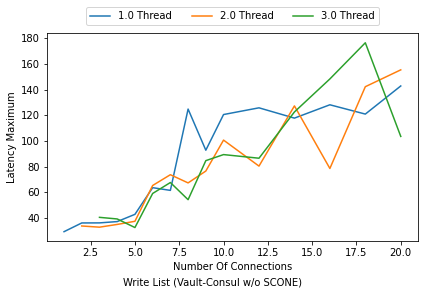

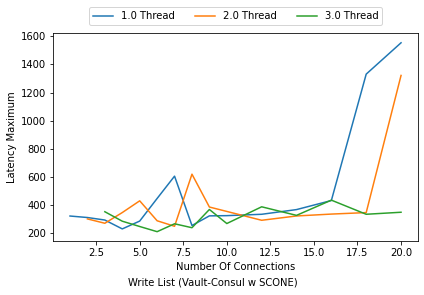

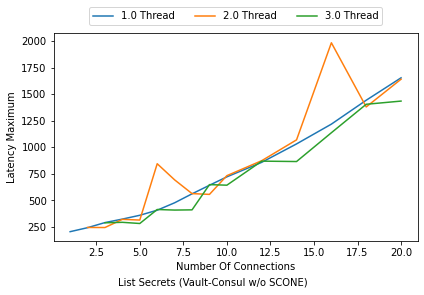

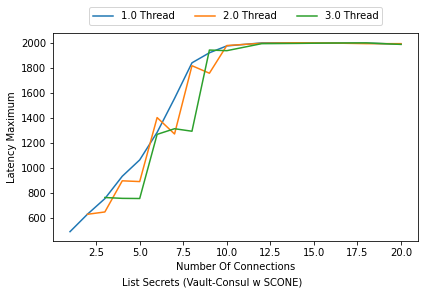

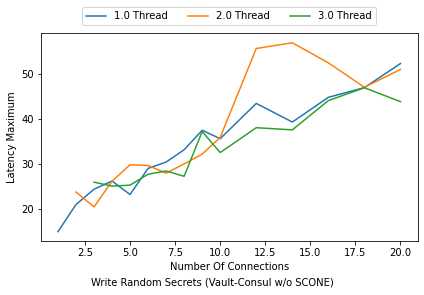

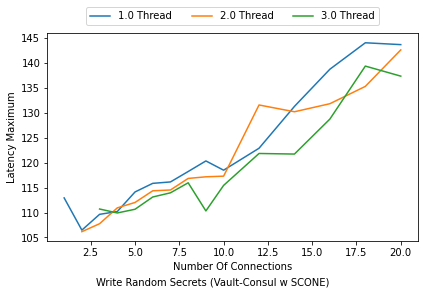

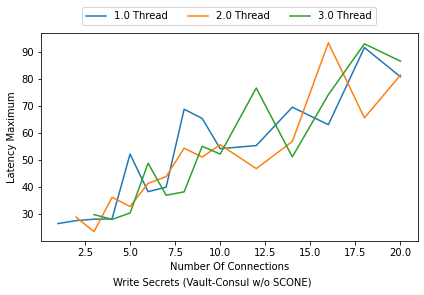

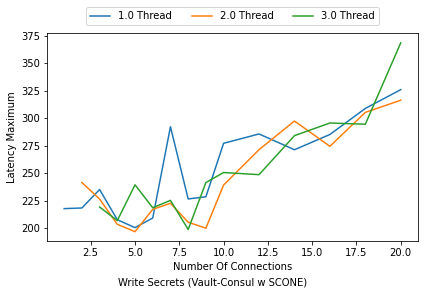

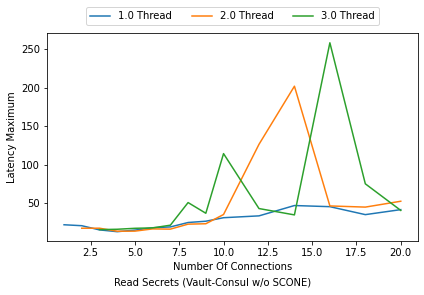

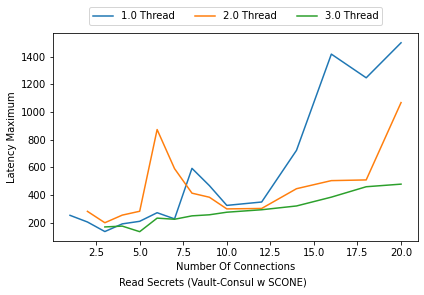

In [5]:
# run_times = [20,30,40,50]
run_type = [file_write_list,file_list_secrets,file_write_random_secrets,file_write_secrets,file_read_secrets]
graph_labels = ["Write List ","List Secrets ", "Write Random Secrets ", "Write Secrets ", "Read Secrets "]
run_times = [50]
for i in range(len(run_type)): 
    for run_time in run_times:
        df_list = pandas.read_csv(run_type[i] % "basic").astype(dtype=float)
        df_list = df_list[(df_list['run_time'] == run_time)]
        df_list_tc_request = df_list.groupby(['threads', 'connections'],as_index=False).mean()
        # print(df_list_tc_request)
        fig, ax = plt.subplots()
        for key, grp in df_list_tc_request.groupby(['threads']):
            ax = grp.plot(ax=ax, kind='line', x='connections', y='lat_max', label=str(key)+" Thread")
        
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
            ncol=3, fancybox=True)
        plt.ylabel('Latency Maximum')
        plt.xlabel('Number Of Connections')
        plt.tight_layout(pad=1.08)
        fig.text(.5, -.01, graph_labels[i] + "(Vault-Consul w/o SCONE)", ha='center')
        plt.show()
        df_list = pandas.read_csv(run_type[i] % "scone").astype(dtype=float)
        df_list = df_list[(df_list['run_time'] == run_time)]
        df_list_tc_request = df_list.groupby(['threads', 'connections'],as_index=False).mean()
        # print(df_list_tc_request)
        fig, ax = plt.subplots()
        for key, grp in df_list_tc_request.groupby(['threads']):
            ax = grp.plot(ax=ax, kind='line', x='connections', y='lat_max', label=str(key)+" Thread")
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
            ncol=3, fancybox=True)
        plt.ylabel('Latency Maximum')
        plt.xlabel('Number Of Connections')
        plt.tight_layout(pad=1.08)
        plt.figtext(.5, -.01, graph_labels[i]+ "(Vault-Consul w SCONE)", ha='center')
        plt.show()

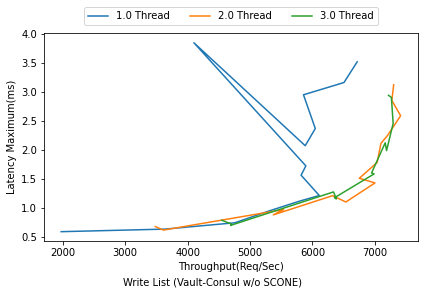

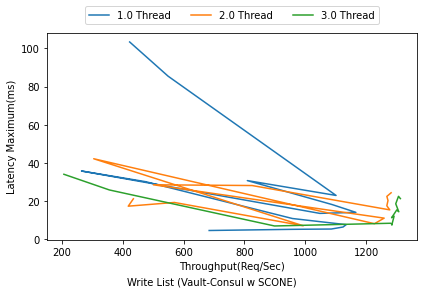

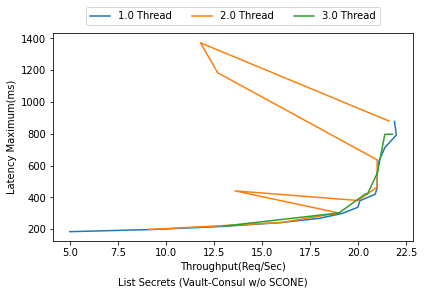

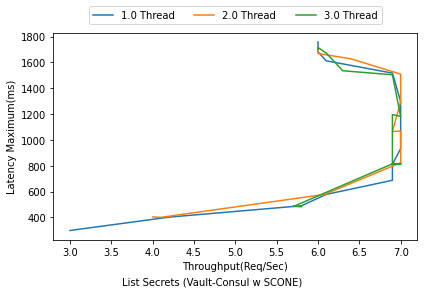

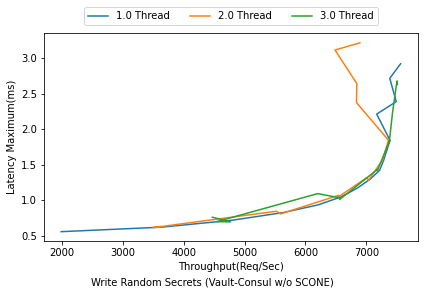

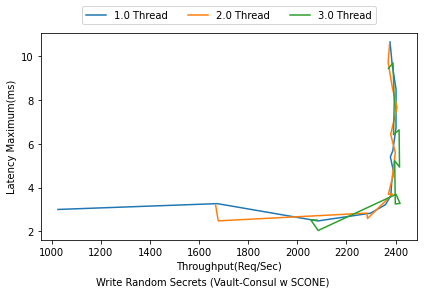

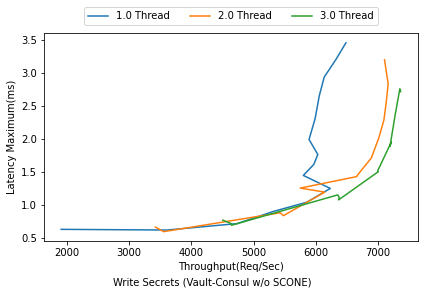

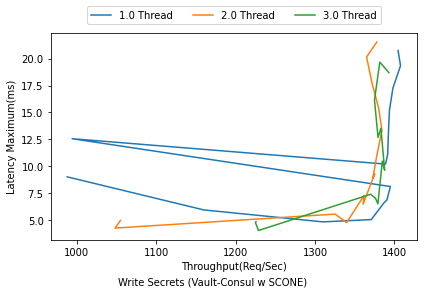

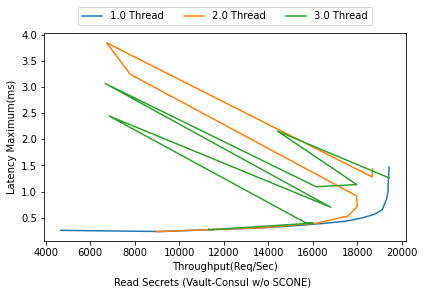

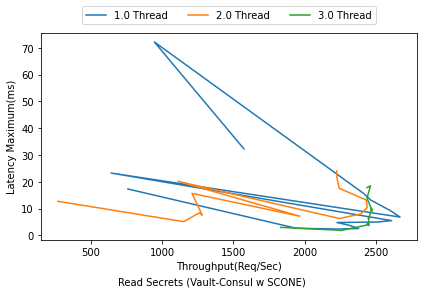

In [17]:
# run_times = [20,30,40,50]
run_type = [file_write_list,file_list_secrets,file_write_random_secrets,file_write_secrets,file_read_secrets]
graph_labels = ["Write List ","List Secrets ", "Write Random Secrets ", "Write Secrets ", "Read Secrets "]
run_times = [20]
for i in range(len(run_type)): 
    for run_time in run_times:
        df_list = pandas.read_csv(run_type[i] % "basic").astype(dtype=float)
        df_list = df_list[(df_list['run_time'] == run_time)]
        df_list_tc_request = df_list.groupby(['threads', 'connections'],as_index=False).mean()
        # print(df_list_tc_request)
        fig, ax = plt.subplots()
        for key, grp in df_list_tc_request.groupby(['threads']):
            ax = grp.plot(ax=ax, kind='line', x='throughput', y='lat_avg', label=str(key)+" Thread")
        
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
            ncol=3, fancybox=True)
        plt.ylabel('Latency Maximum(ms)')
        plt.xlabel('Throughput(Req/Sec)')
        plt.tight_layout(pad=1.08)
        fig.text(.5, -.01, graph_labels[i] + "(Vault-Consul w/o SCONE)", ha='center')
        plt.show()
        df_list = pandas.read_csv(run_type[i] % "scone").astype(dtype=float)
        df_list = df_list[(df_list['run_time'] == run_time)]
        df_list_tc_request = df_list.groupby(['threads', 'connections'],as_index=False).mean()
        # print(df_list_tc_request)
        fig, ax = plt.subplots()
        for key, grp in df_list_tc_request.groupby(['threads']):
            ax = grp.plot(ax=ax, kind='line', x='throughput', y='lat_avg', label=str(key)+" Thread")
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
            ncol=3, fancybox=True)
        plt.ylabel('Latency Maximum(ms)')
        plt.xlabel('Throughput(Req/Sec)')
        plt.tight_layout(pad=1.08)
        plt.figtext(.5, -.01, graph_labels[i]+ "(Vault-Consul w SCONE)", ha='center')
        plt.savefig("images/" + graph_labels[i])
        plt.show()
        

In [7]:
df_list_columns = pandas.read_csv(file_write_list % "scone").astype(dtype=float)
print(df_list_columns.columns)

Index(['run_time', 'lat_avg', 'lat_stdev', 'lat_max', 'lat_stdevpm', 'req_avg',
       'req_stdev', 'req_max', 'req_stdevpm', 'read', 'err_connect',
       'err_read', 'err_write', 'err_timeout', 'req_sec_tot', 'read_tot',
       'threads', 'connections', 'total_requests', 'total_responses',
       'min_lat', '50per', '90per', '99per', '9999per', 'throughput'],
      dtype='object')


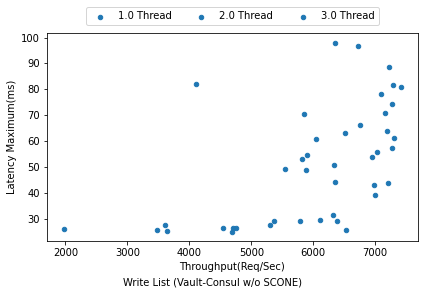

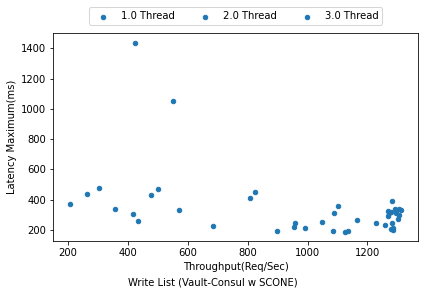

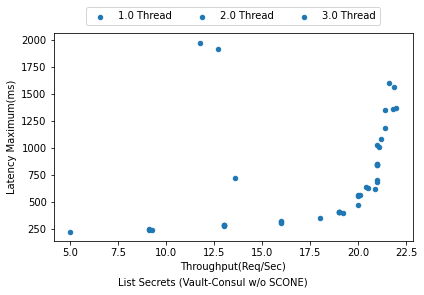

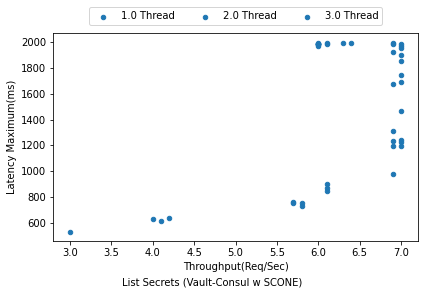

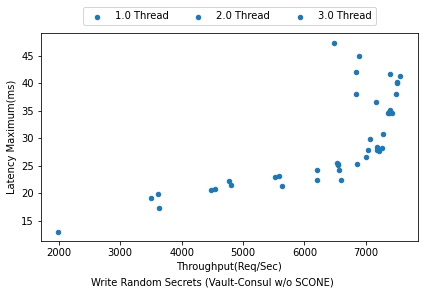

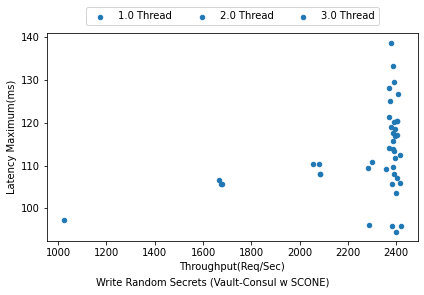

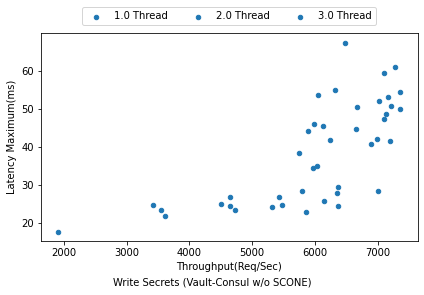

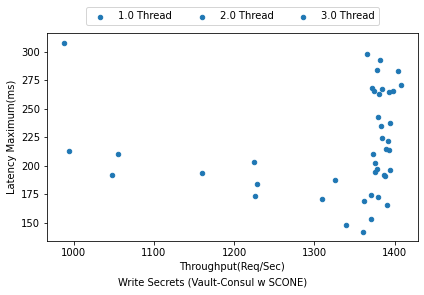

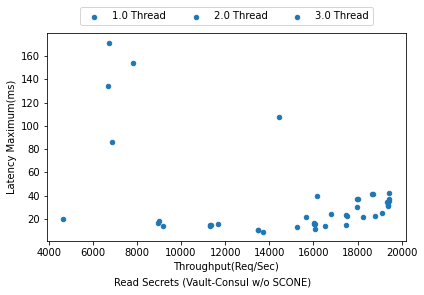

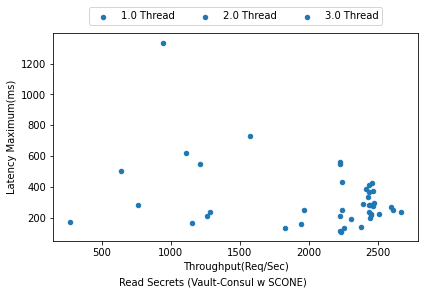

In [8]:
# run_times = [20,30,40,50]
run_type = [file_write_list,file_list_secrets,file_write_random_secrets,file_write_secrets,file_read_secrets]
graph_labels = ["Write List ","List Secrets ", "Write Random Secrets ", "Write Secrets ", "Read Secrets "]
run_times = [20]
for i in range(len(run_type)): 
    for run_time in run_times:
        df_list = pandas.read_csv(run_type[i] % "basic").astype(dtype=float)
        df_list = df_list[(df_list['run_time'] == run_time)]
        df_list_tc_request = df_list.groupby(['threads', 'connections'],as_index=False).mean()
        # print(df_list_tc_request)
        fig, ax = plt.subplots()
        for key, grp in df_list_tc_request.groupby(['threads']):
            ax = grp.plot(ax=ax, kind='scatter', x='throughput', y='lat_max', label=str(key)+" Thread")
        
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
            ncol=3, fancybox=True)
        plt.ylabel('Latency Maximum(ms)')
        plt.xlabel('Throughput(Req/Sec)')
        plt.tight_layout(pad=1.08)
        fig.text(.5, -.01, graph_labels[i] + "(Vault-Consul w/o SCONE)", ha='center')
        plt.show()
        df_list = pandas.read_csv(run_type[i] % "scone").astype(dtype=float)
        df_list = df_list[(df_list['run_time'] == run_time)]
        df_list_tc_request = df_list.groupby(['threads', 'connections'],as_index=False).mean()
        # print(df_list_tc_request)
        fig, ax = plt.subplots()
        for key, grp in df_list_tc_request.groupby(['threads']):
            ax = grp.plot(ax=ax, kind='scatter', x='throughput', y='lat_max', label=str(key)+" Thread")
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
            ncol=3, fancybox=True)
        plt.ylabel('Latency Maximum(ms)')
        plt.xlabel('Throughput(Req/Sec)')
        plt.tight_layout(pad=1.08)
        plt.figtext(.5, -.01, graph_labels[i]+ "(Vault-Consul w SCONE)", ha='center')
        plt.show()

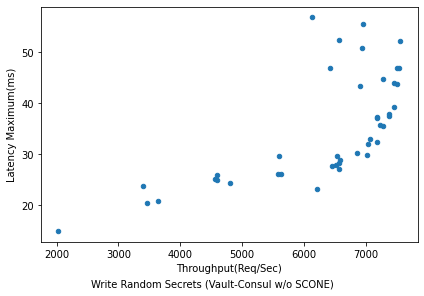

In [9]:
# run_times = [20,30,40,50]
# run_type = [file_write_list,file_list_secrets,file_write_random_secrets,file_write_secrets,file_read_secrets]
# graph_labels = ["Write List ","List Secrets ", "Write Random Secrets ", "Write Secrets ", "Read Secrets "]
run_type = [file_write_random_secrets]
graph_labels = ["Write Random Secrets "]
run_times = [50]
x_axis = ['50per','90per','99per','99.99per']
import numpy as np
from scipy import stats
for i in range(len(run_type)): 
    for run_time in run_times:
        df_list = pandas.read_csv(run_type[i] % "basic").astype(dtype=float)
        df_list = df_list[(df_list['run_time'] == run_time)]
        df_list_tc_request = df_list.groupby(['threads', 'connections'],as_index=False).mean()
        
        fig, ax = plt.subplots()
        for key, grp in df_list_tc_request.groupby(['50per','90per','99per','9999per']):

            ax = grp.plot(ax=ax, kind='scatter',x='throughput', y='lat_max')
        # plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
        #     ncol=3, fancybox=True)
        plt.ylabel('Latency Maximum(ms)')
        plt.xlabel('Throughput(Req/Sec)')
        plt.tight_layout(pad=1.08)
        fig.text(.5, -.01, graph_labels[i] + "(Vault-Consul w/o SCONE)", ha='center')
        plt.show()
        # df_list = pandas.read_csv(run_type[i] % "scone").astype(dtype=float)
        # df_list = df_list[(df_list['run_time'] == run_time)]
        # df_list_tc_request = df_list.groupby(['threads', 'connections'],as_index=False).mean()
        # fig, ax = plt.subplots()
        # for key, grp in df_list_tc_request.groupby(['threads']):
        #     ax = grp.plot(ax=ax, kind='line', x='throughput', y='9999per', label=str(key)+" Thread")
        # plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
        #     ncol=3, fancybox=True)
        # plt.ylabel('Latency Maximum(ms)')
        # plt.xlabel('Throughput(Req/Sec)')
        # plt.tight_layout(pad=1.08)
        # plt.figtext(.5, -.01, graph_labels[i]+ "(Vault In-Mem w SCONE)", ha='center')
        # plt.show()